## Importing Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Dataset

In [2]:
data = pd.read_csv("C:\\Users\\DELL\\Downloads\\Abhipsa - Projects\\Abhipsa - Projects\\Project - 2 Data (Telco Churn Data).csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.shape

(7043, 21)

## Summary

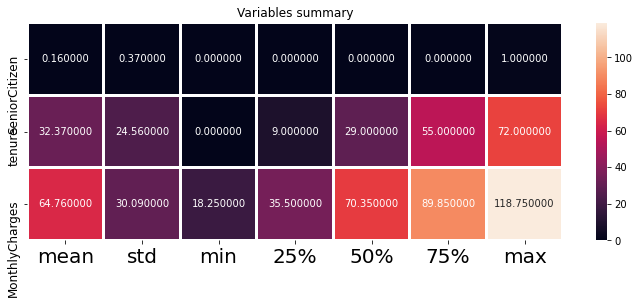

In [4]:
plt.figure(figsize=(12,4))
sns.heatmap(round(data.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=20)
plt.yticks(fontsize=12)
plt.title("Variables summary")
plt.show()

## checking datatypes

In [5]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Converting total charges to numeric

In [6]:
data['TotalCharges']= pd.to_numeric(data['TotalCharges'], errors='coerce')

## Unique Values

In [7]:
data.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          2
InternetService        3
OnlineSecurity         2
OnlineBackup           2
DeviceProtection       2
TechSupport            2
StreamingTV            2
StreamingMovies        2
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64

Droping customer id, as it won't affect churn, as all values are unique

In [8]:
data=data.drop('customerID', axis=1)

## Checking For Null Values

In [9]:
data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

There are only 11 rows , So updated these values by using mean

In [10]:
data=data.fillna(data.mean())

In [11]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
data.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

## Visualization

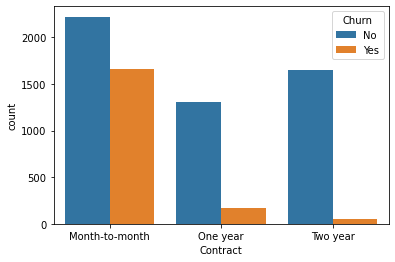

In [13]:
sns.countplot(x='Contract',hue='Churn',data=data)

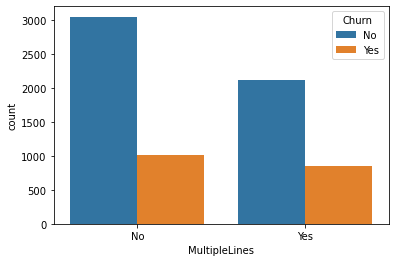

In [14]:
sns.countplot(x='MultipleLines',hue='Churn',data=data)

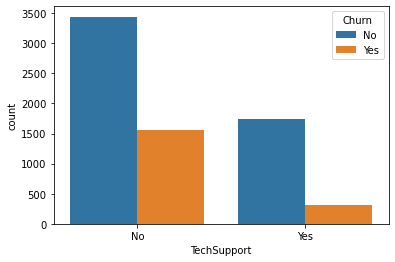

In [15]:
sns.countplot(x='TechSupport',hue='Churn',data=data)

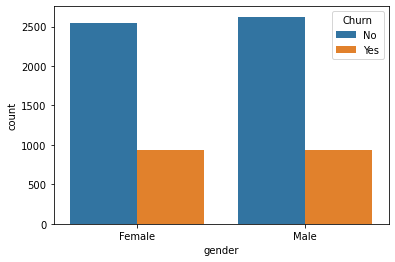

In [16]:
sns.countplot(x='gender',hue='Churn',data=data)

In [17]:
data.groupby('gender').mean()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
gender,,,,
Female,0.162844,32.244553,65.204243,2283.191142
Male,0.161463,32.495359,64.327482,2283.407680


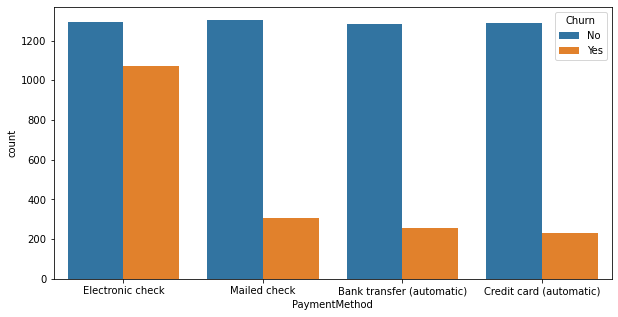

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(x='PaymentMethod',hue='Churn',data=data)

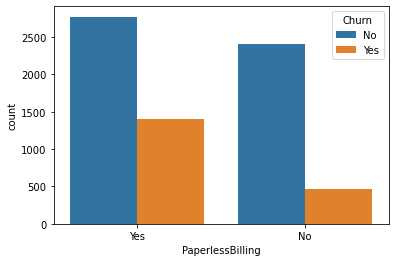

In [19]:
sns.countplot(x='PaperlessBilling',hue='Churn',data=data)

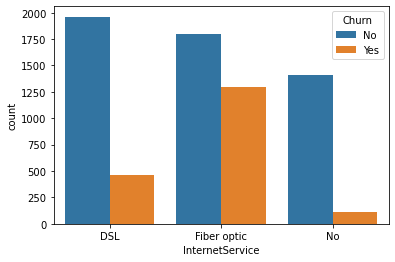

In [20]:
sns.countplot(x='InternetService',hue='Churn',data=data)

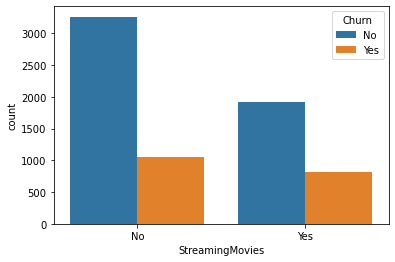

In [21]:
sns.countplot(x='StreamingMovies',hue='Churn',data=data)

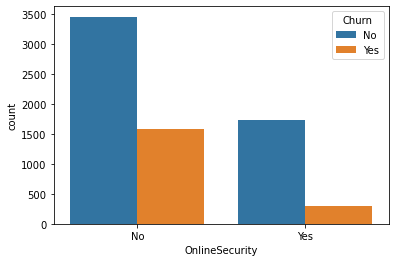

In [22]:
sns.countplot(x='OnlineSecurity',hue='Churn',data=data)

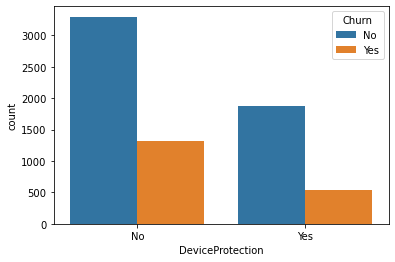

In [23]:
sns.countplot(x='DeviceProtection',hue='Churn',data=data)

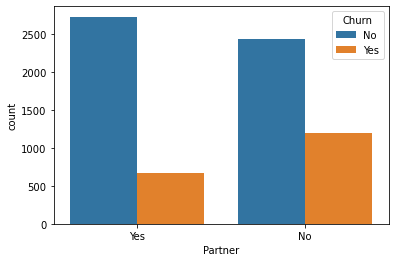

In [24]:
sns.countplot(x='Partner',hue='Churn',data=data)

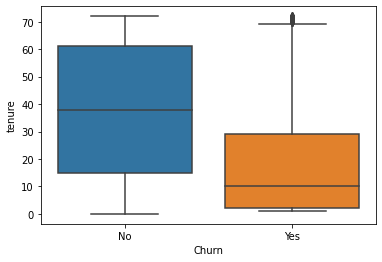

In [25]:
sns.boxplot(data=data, x='Churn', y='tenure')

In [26]:
data['Churn'].value_counts(normalize =True)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

In [27]:
data.replace({'Churn': {"yes": 1,'no':0}},inplace=True)

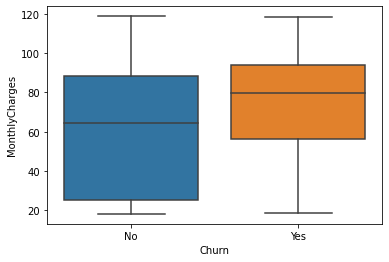

In [28]:
sns.boxplot(data=data, x='Churn', y='MonthlyCharges')

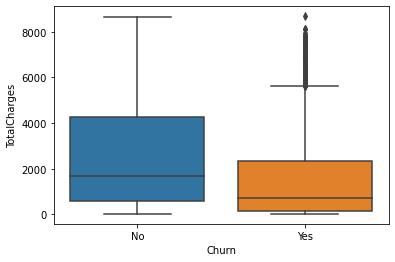

In [29]:
sns.boxplot(data=data, x='Churn', y='TotalCharges')

Dividing into dependent and independent variable

In [30]:

y = data['Churn'].map({'Yes':1,'No':0})
X = data.drop(labels=['Churn'],axis=1).copy()

In [31]:
X.shape

(7043, 19)

In [32]:
y.shape

(7043,)

In [33]:
#find list of categorical columns for encoding
cat_cols = []
for column in X.columns:
    if column not in ['tenure','MonthlyCharges','TotalCharges']:
        cat_cols.append(column)

In [34]:
#Convert categorical columns to dummy var
X= pd.get_dummies(X,columns=cat_cols)

In [35]:
#shape after conversion of categorical features
X.head()

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,1,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,34,56.95,1889.50,0,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,2,53.85,108.15,0,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,45,42.30,1840.75,0,1,1,0,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,2,70.70,151.65,1,0,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


# Modeling

In [36]:
# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [37]:
#create seperate train and test splits for validation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [42]:
# Model 1- logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
model = LogisticRegression()
result = model.fit(X_train, y_train)
from sklearn import metrics
prediction_test = model.predict(X_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))
print(classification_report(y_test, prediction_test))

0.8019872249822569
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1026
           1       0.68      0.51      0.58       383

    accuracy                           0.80      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.79      0.80      0.79      1409



C:\Users\DELL\AN\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [44]:
# Model 2 Random Forest
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))
print(classification_report(y_test, prediction_test))

0.801277501774308
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1026
           1       0.72      0.45      0.55       383

    accuracy                           0.80      1409
   macro avg       0.77      0.69      0.71      1409
weighted avg       0.79      0.80      0.78      1409



Feature Importance

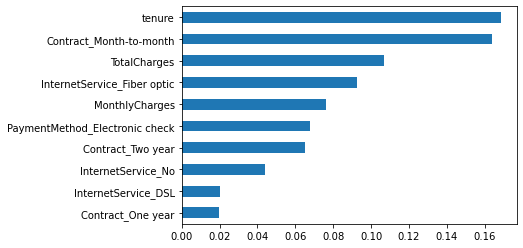

In [41]:
importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')